# Calculating the kinetic and potential energy of the QHO using numerical differentiation and integration
## Janos Revesz, SN: 19111202
In the following notebook the second derivative of the ground state solution of the QHO is calculated using numerical differentiation. The|n using this result and the scipy integrate library the potential energy and kinetic energy of the ground state solution is calculated. Several plots are also included of the mentioned functions.

In [1]:
# import the libraries used below
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib notebook

### Create the wave function and calculate it's second derivative
The eigenvalue equation for the TISE:
$ H \Psi = E \Psi $
where $H$ is the Hamiltonian or energy operator.
  $H = - \frac {1}{2} \frac {d^2}{d x^2}+\frac {1}{2} \omega^2 x^2$
    
  Using atomic units $\hbar = m = 1$ and $\omega = 1 $
the ground state solution of the Quantum Harmonic Oscillator is:
$ \psi = \left({\frac{2\alpha}{\pi}}\right)^{1/4} e^{-\alpha x^2}$
  

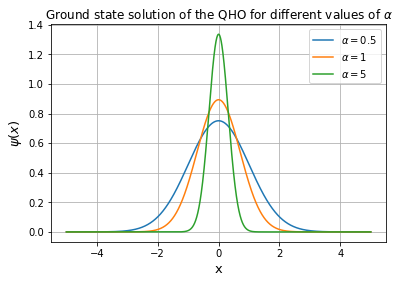

In [2]:
# x represents the inputs for a function as a set of evenly placed gridpoints
dx = 0.0001
x = np.arange(-5,5,dx)

# psi, the ground state solution of the QHO
def psi(x,alpha = 1.0):
    """ This function implements the ground state solution of the 
    Quantum Harmonic Oscillator.
    
    x: the gridpoints that serve as the input of the function
    alpha: the value of the constant alpha with default value 1
    
    return: an array of the outputs which are calculated from the gridpoints x
    """
    psi_x = (2*alpha/np.pi)**(1/4) * np.exp(-alpha*x**2)
    return psi_x

# array for the wavefuntion when alpha=0.5/1/5
psi_05 = psi(x,0.5)
psi_1 = psi(x,1)
psi_5 = psi(x,5)

# plotting the ground state solution of the QHO for different values of alpha
plt.plot(x,psi_05,label=r"$\alpha=0.5$")
plt.plot(x,psi_1,label=r"$\alpha=1$")
plt.plot(x,psi_5,label=r"$\alpha=5$")
plt.xlabel("x",fontsize=13)
plt.ylabel(r"$\psi(x)$",fontsize=13)
plt.title(r"Ground state solution of the QHO for different values of $\alpha$")
plt.legend(loc="upper right")
plt.grid(True)

Comment: I have tried using values between 0.1 and 0.000001 for dx, but in the end coose the value dx = 0.0001 as any dx, smaller than that caused errors. dx=0.1 gave rough plots and calculations, but any dx<0.001 gave sensible results.

Using the formula $$f''(x)=\frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{\Delta x^2}$$
to calculate the second derivative of a function numerically.

In [3]:
# implementing the 2nd derivative of a function
def d2f(f,x,dx):
    """This function implements taking the second derivative of a function numerically.
    
    f: the input function, of which the second derivative is calculated
    x: the gridpoints that serve as the input of the function
    dx: the finite difference for calculating the derivative
    
    return: an array of the values of the second derivative calculated
    at the values of x
    """
    d2f = (f(x+dx)-2*f(x)+f(x-dx))/(dx**2)
    return d2f

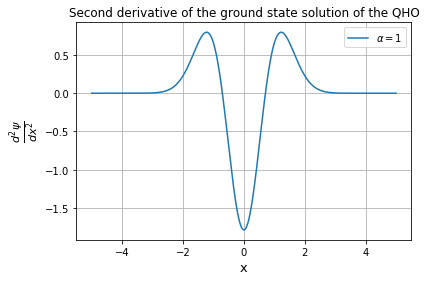

In [4]:
# the second derivative of psi when alpha=1
d2psi = d2f(psi,x,dx)

# plot the second derivative of psi
plt.plot(x,d2psi,label=r"$\alpha=1$")
plt.xlabel("x",fontsize=13)
plt.ylabel(r"$\frac{d^2\psi}{dx^2}$",fontsize=16)
plt.title("Second derivative of the ground state solution of the QHO")
plt.grid(True)
plt.legend(loc="upper right")

### Calculating the KE and PE for the ground state solution of the QHO
Where the kinetic energy and potential energy are calculated using the formulas   
$$E_{KE}=-\frac{1}{2} \int \psi(x) \frac{d^2\psi}{dx^2} dx$$  
 
 $$E_{PE}=\frac{1}{2} k \int \psi(x) \psi(x) x^2 dx$$ 
 
 using $k=1$

Text(0.5, 1.0, 'The function to be integrated for PE')

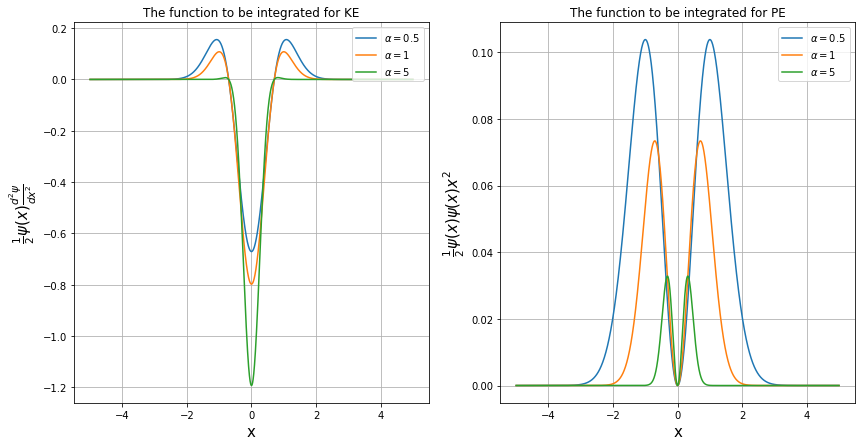

In [5]:
# Plot psi*d2psi and psi*(0.5*x*x)*psi
fig1 = plt.figure(figsize=(14,7))

# first plot
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(x,1/2*psi(x,0.5)*d2psi,label=r"$\alpha=0.5$")
ax1.plot(x,1/2*psi(x)*d2psi,label=r"$\alpha=1$")
ax1.plot(x,1/2*psi(x,5)*d2psi,label=r"$\alpha=5$")
ax1.set_xlabel('x',fontsize=15)
ax1.set_ylabel(r"$\frac{1}{2} \psi(x) \frac{d^2\psi}{dx^2}$",fontsize=15)
ax1.legend(loc="upper right")
ax1.grid()
ax1.set_title("The function to be integrated for KE")

# second plot
ax2 = fig1.add_subplot(1,2,2)
ax2.plot(x,x**2/2*psi(x,0.5)*psi(x,0.5),label=r"$\alpha=0.5$")
ax2.plot(x,x**2/2*psi(x)*psi(x),label=r"$\alpha=1$")
ax2.plot(x,x**2/2*psi(x,5)*psi(x,5),label=r"$\alpha=5$")
ax2.set_xlabel('x',fontsize=15)
ax2.set_ylabel(r"$\frac{1}{2}  \psi(x) \psi(x) x^2$",fontsize=15)
ax2.legend(loc="upper right")
ax2.grid()
ax2.set_title("The function to be integrated for PE")

In [6]:

# Calculate KE using integrate.simps( array, x)
KE =  -1/2 *integrate.simps(psi(x,1)*d2f(psi,x,dx),x)
# Calculate PE using integrate.simps( array, x)
PE = 1/2 * integrate.simps(psi(x,1)*psi(x,1)*(x**2),x)
# Print results
print("KE= ", KE)
print("PE= ", PE)

KE=  0.499999998713077
PE=  0.12499999999999997


Comment: 80% of the total energy is the kinetic energy and 20% of it is the potential energy. This is also seen on the plots, as the minimum of the KE function is at -1.2 and is negated for the integration while the maximum for the potential energy is at 0.1. Simply said the KE plot is larger than the PE plot hence when integrating gives a larger value.

### Optional
Note that because of the way I defined the psi function I have to use lambda functions to calculate the second derivative for any psi where alpha is not equal to 1.

From the above plots we can see that as alpha increases the kinetic energy increases with it and the potential energy decreases.

In [7]:

# Calculate KE for alpha=0.5
KE =  -1/2 *integrate.simps(psi(x,0.5)*d2f(lambda x:psi(x,0.5),x,dx),x)
# Calculate PE for alpha=0.5
PE = 1/2 * integrate.simps(psi(x,0.5)*psi(x,0.5)*(x**2),x)
# Print results
print("KE= ", KE)
print("PE= ",PE)

KE=  0.24999999965208974
PE=  0.24999999998001726


### Conclusions
The two energy values do not change siginificantly from dx=0.1 to dx=0.0001. Going below dx=0.0001 increases runtime and leads to errors.  